By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/04/19

Video: [[10分鐘搞懂機器學習] 1.1 Python實作 使用Python了解你的資料](https://youtu.be/mZh8Ykgku-c?si=8GsRWRPPEeItQqbX)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


Topic 1: 了解你的資訊

In [ ]:
# dataset來源 https://github.com/ageron/handson-ml2
# housing 資料路徑 handson-ml2/datasets/housing/housing.csv

from google.colab import drive
import pandas as pd

# 连接到Google Drive
drive.mount('/content/drive')

# 读取CSV文件
file_path = "/content/drive/My Drive/ML/ch1 data processing/housing.csv"  # 根據雲端檔案位置，修改dataset的文件路徑
housing_prices_data = pd.read_csv(file_path)






Mounted at /content/drive


In [ ]:
# 二維的加標籤資料結構
type(housing_prices_data)

pandas.core.frame.DataFrame

In [ ]:
# 使用head()

housing_prices_data.head(16)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
# 使用info()
housing_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_prices_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Topic 2: 從資料到資訊，個別特徵的統計資訊。 呈現方式: (1) 數值化 describe()，使用平均值、標準差、最小值、最大值、四分位數；(2) 圖示化 hist()，使用長方圖

In [ ]:
# 針對數值資料提供統計資訊
housing_prices_data.describe()

In [ ]:
import matplotlib.pyplot as plt


housing_prices_data.hist(bins=60,figsize=(20,15))  # bins是柱子的数量
plt.show()


Topic 3: 從資料到資訊，兩兩特徵的相關性。
呈現方式:
(1) 數值化 corr()，使用皮爾森相關係數 (standard correlation coefficient; Pearson's r)；
(2) 圖示化 scatter_matrix()，使用散點圖  


In [ ]:
# 9 features:longitude	latitude	housing_median_age	total_rooms	total_bedrooms	population	households	median_income	median_house_value
# 數值化
corr_matrix=housing_prices_data.corr(numeric_only=True)  # 相關(係數)矩陣 correlation coefficient matrix
corr_matrix['total_rooms'].sort_values(ascending=False)

total_rooms           1.000000
total_bedrooms        0.930380
households            0.918484
population            0.857126
median_income         0.198050
median_house_value    0.134153
longitude             0.044568
latitude             -0.036100
housing_median_age   -0.361262
Name: total_rooms, dtype: float64

In [ ]:
corr_matrix['population'].sort_values(ascending=False)

population            1.000000
households            0.907222
total_bedrooms        0.877747
total_rooms           0.857126
longitude             0.099773
median_income         0.004834
median_house_value   -0.024650
latitude             -0.108785
housing_median_age   -0.296244
Name: population, dtype: float64

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

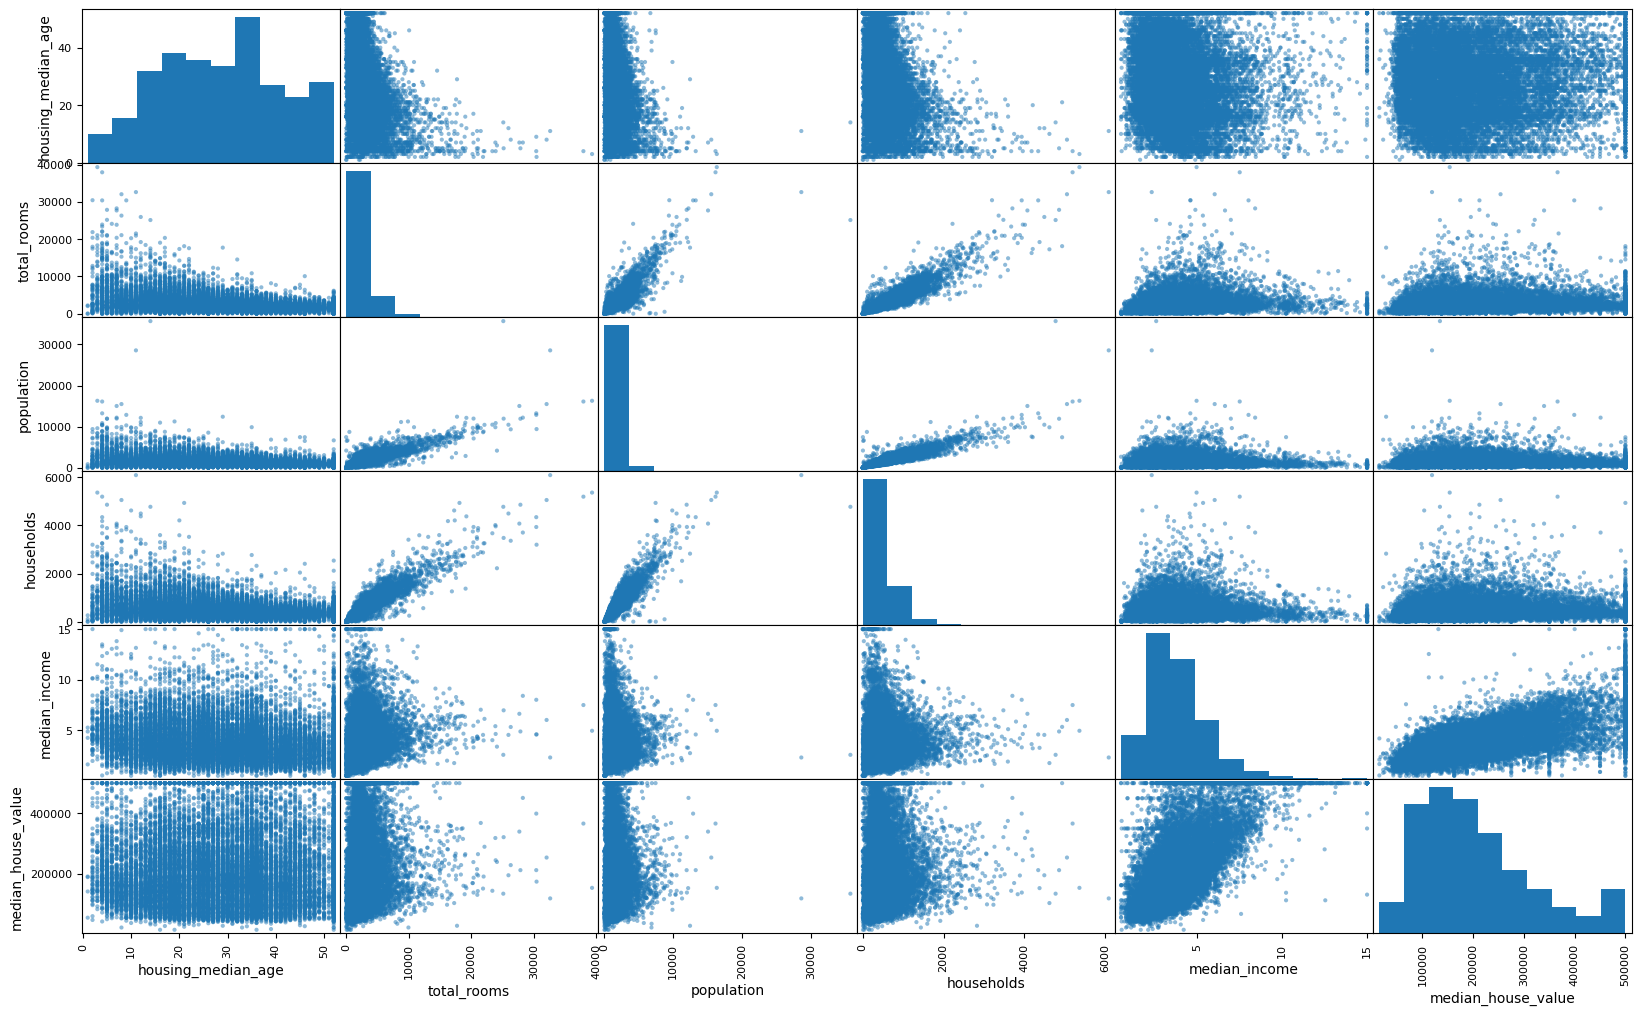

In [ ]:
#圖示化
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

features=['housing_median_age',	'total_rooms',	'population',	'households',	'median_income',	'median_house_value']
scatter_matrix(housing_prices_data[features], figsize=(20,12))
plt.show()

使用相關係數來判斷變數之間關係必須小心，舉例來說，Y,X1不相關、Y,X2不相關，但Y可能是由X1和X2組成，例如 Y=X1-X2+2+noise

Topic: 資料清理 (data cleaning)
(1) 移除特徵值有缺少的樣本(移除列)；(2) 移除所有樣本對應的特徵(移除行)；(3) 填補缺少的資料


In [ ]:
housing_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# (2) 移除所有樣本對應的特徵(移除行)
# drop() creates a copy of the data; using it does not affect housing_prices_data
# Google ``mutable and immutable objectives in python''
housing_prices_data.info()
data_cleaned = housing_prices_data.drop('total_bedrooms',axis=1)
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  floa

In [ ]:
# (3) 填補缺少的資料
# fillna does not copy the data; using it affects housing_prices_data
# using copy() to avoid changing housing_prices_data
# Google `''

data_cleaned=housing_prices_data.copy()
my_median= data_cleaned['total_bedrooms'].median()
data_cleaned['total_bedrooms'].fillna(my_median,inplace=True)
data_cleaned.info()
housing_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  flo